<a href="https://colab.research.google.com/github/Awan2001/My-Akademik-ML-CNN-Face-Recognition-Model-Dev/blob/main/MyAkademikCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Mount the G Drive to the Notebook for getting access to the Image dataset.#

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Import the Required library

In [ ]:
import os
import numpy as np
import tensorflow as tf
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
from keras.utils import plot_model
from keras.optimizers import Adam
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras import layers, applications, utils, models

#Spliting Dataset

In [ ]:
# Suppress TensorFlow info messages
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

# Define paths and parameters
train_data_dir = '/content/drive/My Drive/grayDataset'
img_size = (160, 160)
batch_size = 32

# Set up ImageDataGenerator for training data with validation split
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # 80:20 train-validation split
)

# Flow training images in batches using train_datagen generator
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'  # Specify that this is for training
)

# Flow validation images in batches using train_datagen generator
validation_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'  # Specify that this is for validation
)

# Get number of classes
num_classes = len(train_generator.class_indices)

Found 1920 images belonging to 6 classes.
Found 480 images belonging to 6 classes.


#Defining model architecture

In [ ]:
# Define the model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(img_size[0], img_size[1], 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Summarize layers
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 158, 158, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 79, 79, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 77, 77, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 38, 38, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 36, 36, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 18, 18, 128)      

#Model Training

In [ ]:
# Model training code
from keras.callbacks import EarlyStopping

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    callbacks=[early_stopping]
)

Epoch 1/100
60/60 [==============================] - 7s 122ms/step - loss: 3.6488e-04 - accuracy: 1.0000 - val_loss: 1.3176e-05 - val_accuracy: 1.0000
Epoch 2/100
60/60 [==============================] - 7s 118ms/step - loss: 8.9666e-05 - accuracy: 1.0000 - val_loss: 4.1806e-06 - val_accuracy: 1.0000
Epoch 3/100
60/60 [==============================] - 7s 121ms/step - loss: 1.6209e-04 - accuracy: 1.0000 - val_loss: 5.3010e-05 - val_accuracy: 1.0000
Epoch 4/100
60/60 [==============================] - 7s 116ms/step - loss: 1.1092e-04 - accuracy: 1.0000 - val_loss: 1.6185e-06 - val_accuracy: 1.0000
Epoch 5/100
60/60 [==============================] - 7s 119ms/step - loss: 1.6832e-04 - accuracy: 1.0000 - val_loss: 2.9116e-06 - val_accuracy: 1.0000
Epoch 6/100
60/60 [==============================] - 7s 120ms/step - loss: 1.0021e-04 - accuracy: 1.0000 - val_loss: 4.2610e-06 - val_accuracy: 1.0000
Epoch 7/100
60/60 [==============================] - 7s 118ms/step - loss: 9.7701e-05 - accura

#Model Evaluation (Accuracy Test)

In [ ]:
# Define parameters for testing
test_data_dir = '/content/drive/MyDrive/TestDataset'
test_datagen = ImageDataGenerator(rescale=1./255)

# Generate batches of images from the test dataset
test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

# Evaluate the model on the test generator
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

Found 600 images belonging to 6 classes.
19/19 [==============================] - 2s 104ms/step - loss: 0.0255 - accuracy: 0.9967
Test Accuracy: 99.67%


#ROC AUC Test

Found 600 images belonging to 6 classes.
19/19 [==============================] - 2s 101ms/step


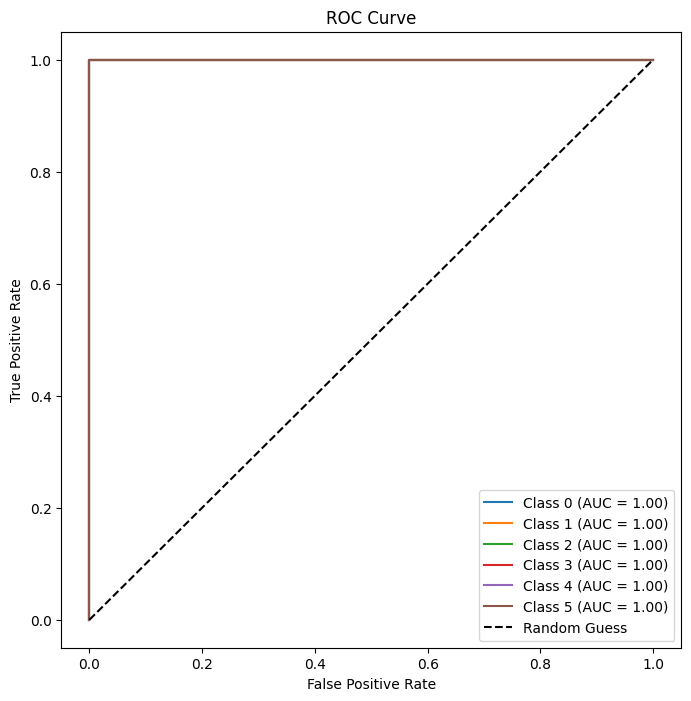

In [ ]:
# Load test data
test_data_dir = '/content/drive/My Drive/TestDataset'
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False  # Important to keep the order of predictions
)

# Generate predictions
test_predictions = model.predict(test_generator)

# Extract true labels and predicted probabilities
true_labels = test_generator.classes
predicted_probabilities = np.argmax(test_predictions, axis=1)

# Compute ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve((true_labels == i).astype(int), test_predictions[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves
plt.figure(figsize=(8, 8))

for i in range(num_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

#Plot Training History Accuracy

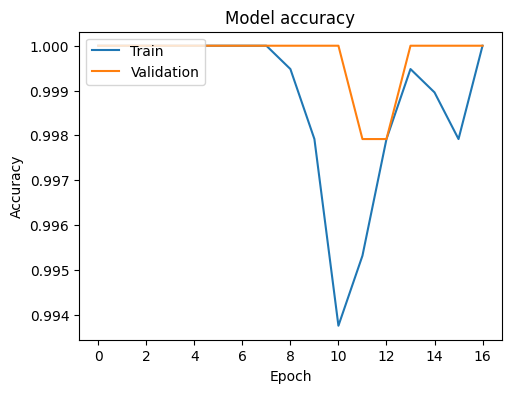

In [ ]:
# Plot training history
plt.figure(figsize=(12, 4))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

#Plot loss history

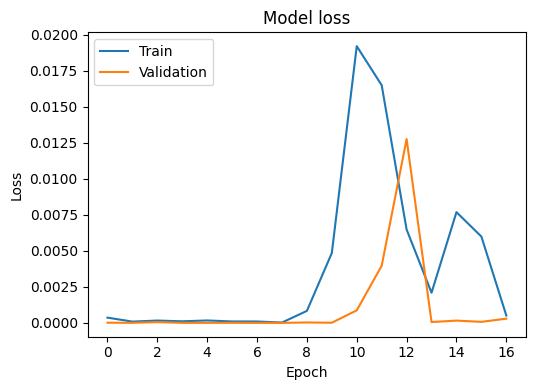

In [ ]:
# Plot training history
plt.figure(figsize=(10, 4))

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()


#Make Prediction on test set (F1 score)

In [ ]:
# Make predictions on the test set
predictions = model.predict(test_generator)
y_true = test_generator.classes
y_pred = predictions.argmax(axis=1)

# Display precision, recall, and F1 score
print("Classification Report:")
print(classification_report(y_true, y_pred))

19/19 [==============================] - 2s 99ms/step
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       100
           1       0.98      1.00      0.99       100
           2       1.00      0.99      0.99       100
           3       1.00      1.00      1.00       100
           4       1.00      1.00      1.00       100
           5       1.00      0.99      0.99       100

    accuracy                           1.00       600
   macro avg       1.00      1.00      1.00       600
weighted avg       1.00      1.00      1.00       600



#Confusion Metric

19/19 [==============================] - 2s 98ms/step
[[100   0   0   0   0   0]
 [  0 100   0   0   0   0]
 [  0   1  99   0   0   0]
 [  0   0   0 100   0   0]
 [  0   0   0   0 100   0]
 [  0   1   0   0   0  99]]


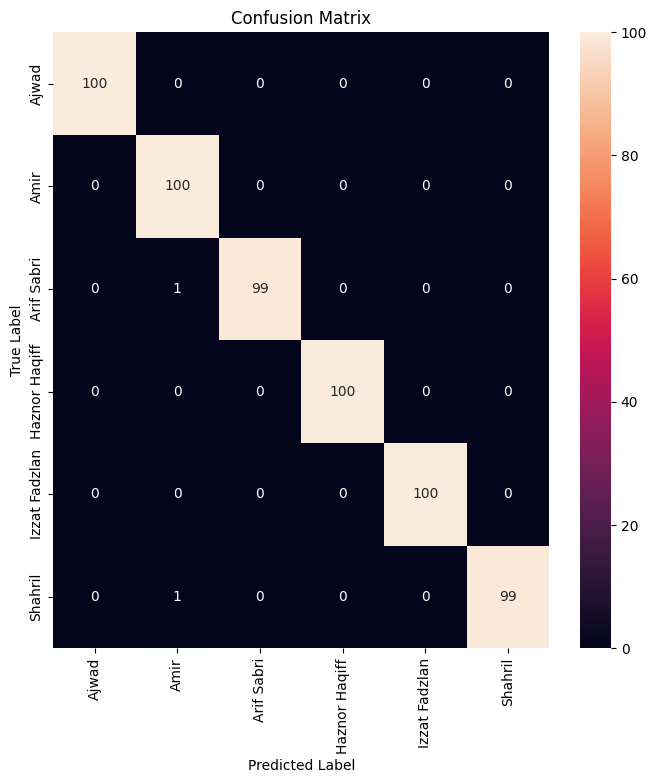

In [ ]:
# Get predictions from your model on the test set
predicted_labels = model.predict(test_generator)

# Get true labels from the test generator
true_labels = test_generator.classes

# Generate confusion matrix, use cm to avoid overwriting function
cm = confusion_matrix(true_labels, np.argmax(predicted_labels, axis=1))

# Print the confusion matrix
print(cm)

class_labels = ['Ajwad', 'Amir', 'Arif Sabri', 'Haznor Haqiff', 'Izzat Fadzlan', 'Shahril']

# Plot the confusion matrix
plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

#Save Model to G Drive

In [ ]:
model = model.save('/content/drive/My Drive/NewModel.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
